Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”

In [99]:
#%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [100]:
def get_gauss_kernel(k_size, sigma):
    kx = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    return np.dot(kx, kx.reshape(1, k_size))

In [101]:
def create_gauss_filter(h, w, k_size, sigma):
    kernel = np.zeros((h, w))
    k = get_gauss_kernel(k_size=k_size, sigma=sigma)

    kernel[h//2 - k_size//2: h//2 + k_size//2 + 1, w//2 - k_size//2: w//2 + k_size//2 + 1] = k
    kernel_tf = np.fft.fft2(kernel)

    return kernel, kernel_tf

In [102]:
def plot_kernels(h, w, k_size, sigma):
    kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("Kernel Gausiano")
    plt.imshow(kernel, cmap='jet')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("FFT del kernel")
    plt.imshow(np.abs(kernel_tf), cmap='jet')

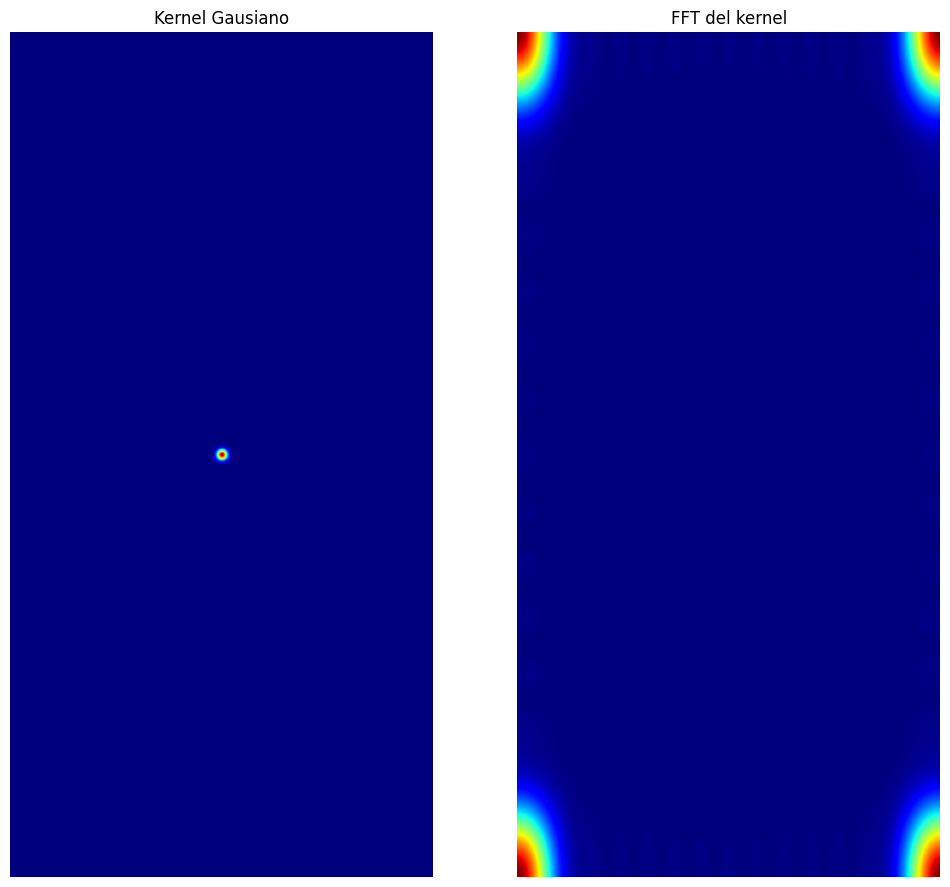

In [103]:
plot_kernels(700, 350, 15, 3)

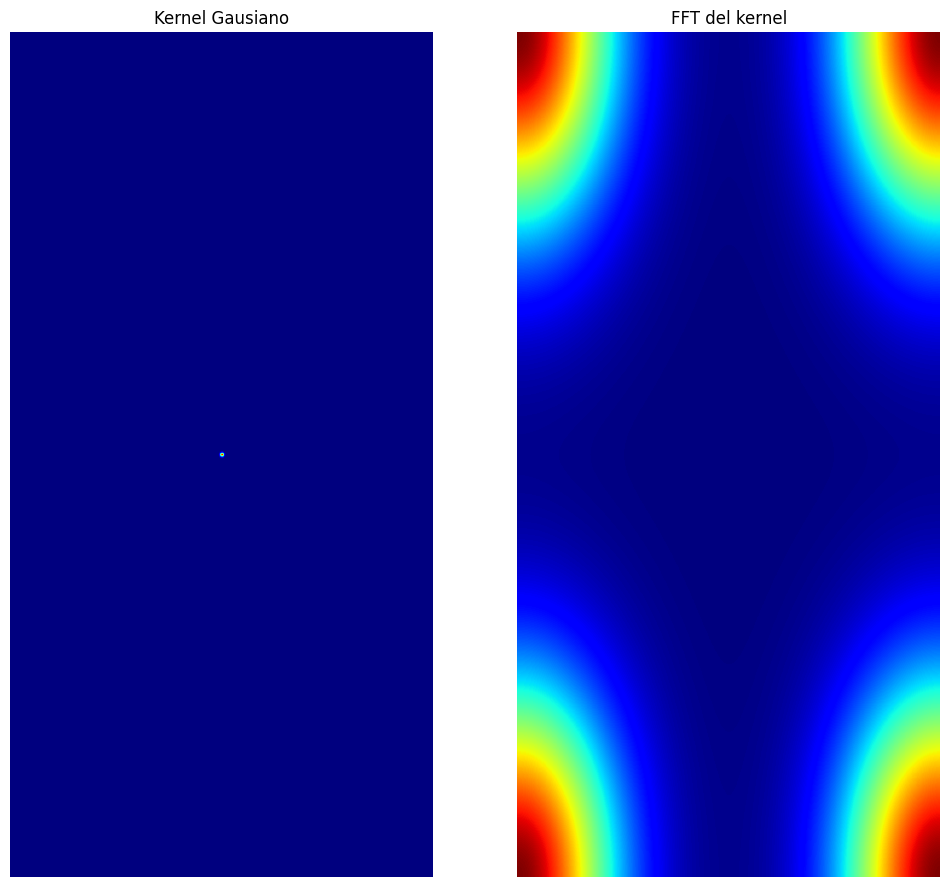

In [104]:
plot_kernels(700, 350, 15, 1)

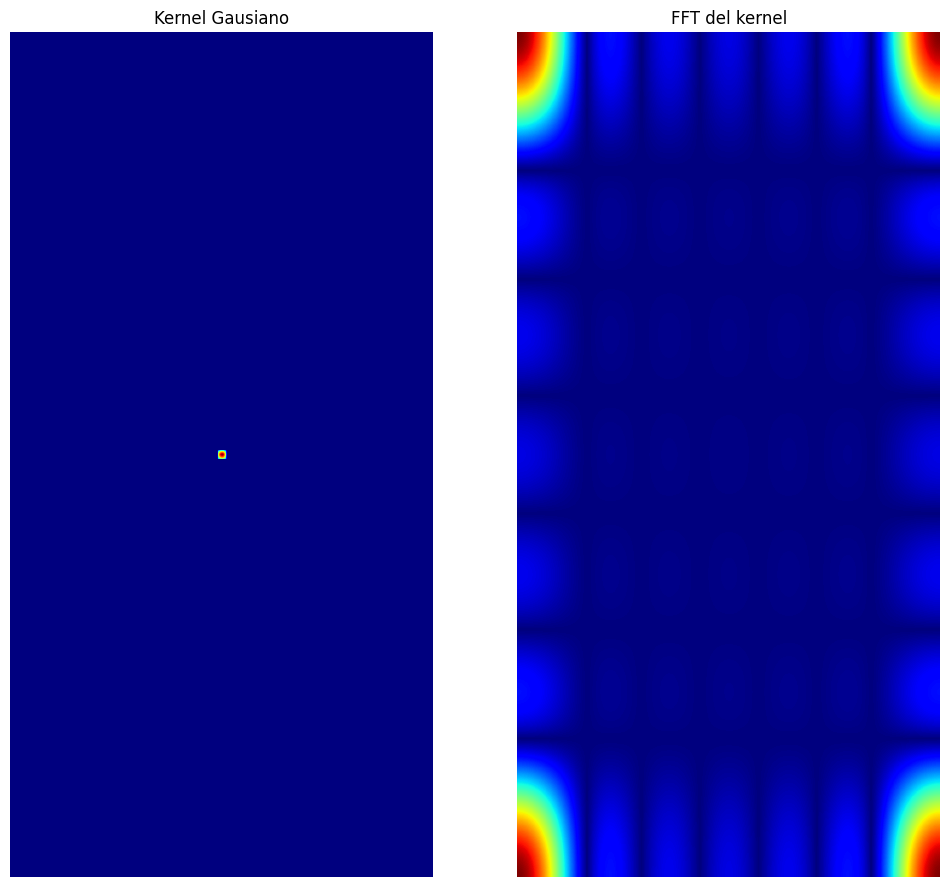

In [105]:
plot_kernels(700, 350, 7, 3)

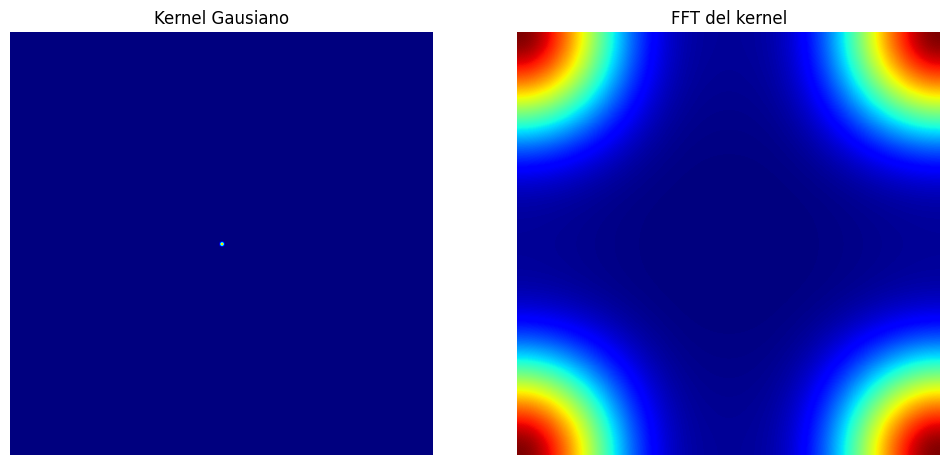

In [106]:
plot_kernels(400, 400, 5, 1)

In [107]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [108]:
def filtrado_espectral(image_path, k_size, sigma):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    img_fft = np.fft.fft2(image)
    kernel, kernel_tf = create_gauss_filter(image.shape[0], image.shape[1], k_size, sigma)
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(img_fft * kernel_tf)))
    return img_gauss

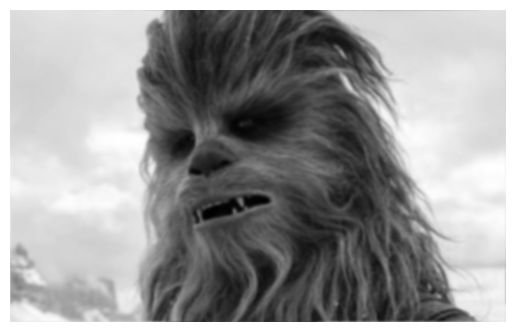

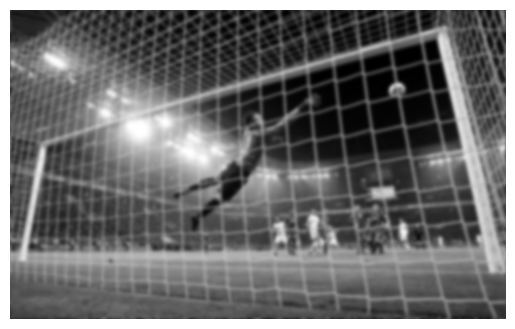

In [109]:
show_img(filtrado_espectral('material/chewbacca.jpg', 15, 3))
show_img(filtrado_espectral('material/golazo.jpg', 15, 3))

In [110]:
def filtrado_convolucion(image_path, k_size, sigma):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    kernel, kernel_tf = create_gauss_filter(image.shape[0], image.shape[1], k_size, sigma)
    blur_image = cv.filter2D(image, -1, kernel)
    return blur_image

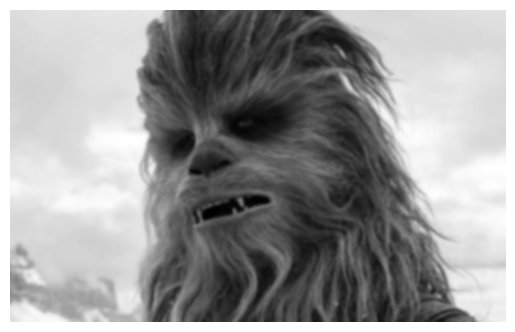

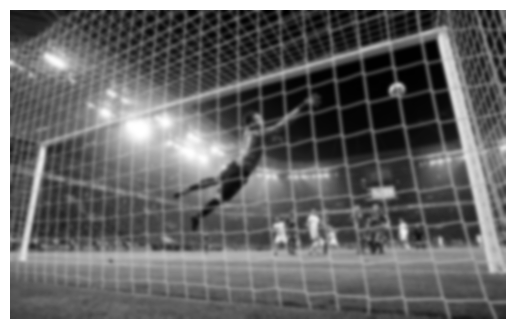

In [111]:
show_img(filtrado_convolucion('material/chewbacca.jpg', 15, 3))
show_img(filtrado_convolucion('material/golazo.jpg', 15, 3))

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

In [112]:
def calculate_image_quality_measure_paper_1(img_i):
    m, n = img_i.shape
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(img_i)
    # Step 2: Find Fc which is obtained by shifting the origin of F to centre.
    Fc = np.fft.fftshift(F)
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.
    AF = np.abs(Fc)
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.
    M = np.max(AF)
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.
    th = (F > M/1000).sum()
    # Step 6: Calculate Image Quality measure (FM)
    fm = th/(m*n)
    return fm

In [113]:
PATH = 'material/golazo.jpg'
print(calculate_image_quality_measure_paper_1(filtrado_convolucion(PATH, 15,3)))
print(calculate_image_quality_measure_paper_1(filtrado_espectral(PATH, 15, 3)))

0.003552190694320736
0.003497052211901429


3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”

In [114]:
def calculate_gray_level_variance(img):
    w, h = img.shape
    u = img.sum()/(w*h)
    sum = 0
    for row in range(w):
        for col in range(h):
            pixel = img[row][col]
            sum += ((pixel - u) ** 2)
    return sum

In [115]:
PATH = 'material/golazo.jpg'
print(calculate_gray_level_variance(filtrado_convolucion(PATH, 15,3)))
print(calculate_gray_level_variance(filtrado_espectral(PATH, 15, 3)))

1199486397.4025254
1194369704.620825
